In [43]:
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import string
import pickle
from sklearn.pipeline import Pipeline

# 1. Mencari Data Set 

In [44]:

dataset = pd.read_csv('dataset_tweet_sentiment_cellular_service_provider.csv')

dataset.head(10) #Printing first 10 rows of the dataset

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>
5,6,negative,Untuk penembakan paket dari <PRODUCT_NAME> mas...
6,7,positive,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa..."
7,8,negative,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...
8,9,negative,keluhan gak ditanggapi. bikin emosi aja. pulsa...
9,10,negative,#Bilboard iklan <PROVIDER_NAME> kok ada pesan ...


In [45]:
dataset.dtypes


Id             int64
Sentiment     object
Text Tweet    object
dtype: object

In [46]:
dataset_positive = dataset[dataset['Sentiment'] == 'positive']
print("Data dengan sentimen positif:")
print(dataset_positive.head(10))

Data dengan sentimen positif:
    Id Sentiment                                         Text Tweet
0    1  positive  <USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1    2  positive  Saktinya balik lagi, alhamdulillah :v <PROVIDE...
6    7  positive  <PROVIDER_NAME>  aku pakai <PROVIDER_NAME>, pa...
16  17  positive  <PROVIDER_NAME> <PROVIDER_NAME> kangen nih dap...
22  23  positive          Jadi stabil disini. <PROVIDER_NAME> <URL>
23  24  positive  #CUG <PROVIDER_NAME> #Community Sangat Cocok B...
32  33  positive  Hore,,, Akhirnya ada sinyal 4G <PROVIDER_NAME>...
33  34  positive  Alhamdulilah dikunjungi para vendor mitra <PRO...
41  42  positive  <PROVIDER_NAME> 1berbagi tanpa kuota 2 berbaga...
42  43  positive  <PROVIDER_NAME> bagi berkah 1video ngabuburit ...


In [47]:
dataset_negatif = dataset[dataset['Sentiment'] == 'negative']
print("Data dengan sentimen negatif:")
print(dataset_negatif.head(10))

Data dengan sentimen negatif:
    Id Sentiment                                         Text Tweet
2    3  negative  Selamat pagi <PROVIDER_NAME>  bisa bantu kenap...
3    4  negative  Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4    5  negative            Selamat malam PENDUSTA <PROVIDER_NAME> 
5    6  negative  Untuk penembakan paket dari <PRODUCT_NAME> mas...
7    8  negative  RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...
8    9  negative  keluhan gak ditanggapi. bikin emosi aja. pulsa...
9   10  negative  #Bilboard iklan <PROVIDER_NAME> kok ada pesan ...
10  11  negative  <PROVIDER_NAME> mampus!!!!! bulan puasa, subuh...
11  12  negative  <USER_MENTION> Pernah coba pakai <PROVIDER_NAM...
12  13  negative  Setuju, <USER_MENTION> silahkan boikot saja pe...


# 2. Cleaning Data

=======================================================================================================================

In [48]:
dataset.columns = ['ID','Sentiment','Komentar_tweet']
dataset

,ID,Sentiment,Komentar_tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>
...,...,...,...
295,296,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan..."
296,297,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>
297,298,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,..."
298,299,positive,"di tempat ramai seperti di lokasi wisata, <PRO..."


In [49]:
dataset.isna().sum()

ID                0
Sentiment         0
Komentar_tweet    0
dtype: int64

=======================================================================================================================

# 3. Melakukan Transformasi Data

In [50]:
# Membuat kolom baru untuk sentimen positif dan negatif
dataset['Sentiments'] = dataset['Sentiment'].apply(lambda x: 0 if x == 'positive' else 1)

# Menampilkan dataset setelah one-hot encoding
print("Dataset setelah one-hot encoding:")
dataset


Dataset setelah one-hot encoding:


,ID,Sentiment,Komentar_tweet,Sentiments
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,0
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",0
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,1
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,1
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,1
...,...,...,...,...
295,296,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan...",0
296,297,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>,0
297,298,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,...",0
298,299,positive,"di tempat ramai seperti di lokasi wisata, <PRO...",0


=======================================================================================================================

# 4. Melakukan Pre-Processing data
# Menghilangkan Karakter yang tidak diperlukan

In [51]:
# Mengganti <PROVIDER_NAME>, <USER_MENTION>, dan <URL> dengan string kosong
dataset['Komentar_tweet'] = dataset['Komentar_tweet'].str.replace('<PROVIDER_NAME>', '')
dataset['Komentar_tweet'] = dataset['Komentar_tweet'].str.replace('<USER_MENTION>', '')
dataset['Komentar_tweet'] = dataset['Komentar_tweet'].str.replace('<URL>', '')

# Menampilkan dataset setelah penggantian
print("Dataset setelah menghapus <PROVIDER_NAME>, <USER_MENTION>, dan <URL>:")
dataset




Dataset setelah menghapus <PROVIDER_NAME>, <USER_MENTION>, dan <URL>:


,ID,Sentiment,Komentar_tweet,Sentiments
0,1,positive,#BOIKOT_ Gunakan Produk Bangsa Sendiri,0
1,2,positive,"Saktinya balik lagi, alhamdulillah :v",0
2,3,negative,Selamat pagi bisa bantu kenapa di dalam kama...,1
3,4,negative,Dear akhir2 ini jaringan data lemot banget pa...,1
4,5,negative,Selamat malam PENDUSTA,1
...,...,...,...,...
295,296,positive,"Pantesan lancar ya, sinyal yang 4G lancar sek...",0
296,297,positive,Alhamdulillah lancar pakai,0
297,298,positive,"Untung pakai internet , lancar, jadi dapat ban...",0
298,299,positive,"di tempat ramai seperti di lokasi wisata, tet...",0


In [52]:
import re
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip("")
    comment = re.sub(r'[?|$|.|*&12_:")(-+,<>#!@]','', comment)
    return comment
dataset['Komentar_tweet'] = dataset['Komentar_tweet'].apply(casefolding)
dataset.head()

,ID,Sentiment,Komentar_tweet,Sentiments
0,1,positive,boikot gunakan produk bangsa sendiri,0
1,2,positive,saktinya balik lagi alhamdulillah v,0
2,3,negative,selamat pagi bisa bantu kenapa di dalam kama...,1
3,4,negative,dear akhir ini jaringan data lemot banget pad...,1
4,5,negative,selamat malam pendusta,1


=======================================================================================================================

In [53]:
# Mengurutkan DataFrame asli berdasarkan kolom 'Sentiment', data positif berada paling atas
dataset.sort_values(by='Sentiment', ascending=False, inplace=True)

# Menampilkan hasil sorting
print("Dataset setelah sorting dengan sentimen positif paling atas:")
dataset

Dataset setelah sorting dengan sentimen positif paling atas:


,ID,Sentiment,Komentar_tweet,Sentiments
0,1,positive,boikot gunakan produk bangsa sendiri,0
136,137,positive,wow saya baru mendapatkan hadiah fantastis dar...,0
138,139,positive,ajaib min kartu saya bisa diisi pulsa diguna...,0
139,140,positive,mantap deh cuma isi pulsa 5ribu dapat bonus p...,0
140,141,positive,terimakasih paket data sudah aktif dan normal...,0
...,...,...,...,...
51,52,negative,aku kira diganti pulsaku udah komplain sana si...,1
185,186,negative,ini sinyal h palsu seperti h rasa edge,1
186,187,negative,pelanggan yg ada di area pandeglangkota diru...,1
187,188,negative,hati-hati tukang tipu,1


=======================================================================================================================

# 5. Melakukan Pre-Processing data

# Tokenizing

In [54]:
import nltk
from nltk.tokenize import word_tokenize

# Tokenizing kolom 'Text Tweet' dan menyimpannya kembali ke kolom yang sama
dataset['Komentar_tweet'] = dataset['Komentar_tweet'].apply(word_tokenize)

# Menampilkan dataset setelah tokenisasi
print("Dataset setelah tokenisasi tanpa kolom baru:")
dataset

Dataset setelah tokenisasi tanpa kolom baru:


,ID,Sentiment,Komentar_tweet,Sentiments
0,1,positive,"[boikot, gunakan, produk, bangsa, sendiri]",0
136,137,positive,"[wow, saya, baru, mendapatkan, hadiah, fantast...",0
138,139,positive,"[ajaib, min, kartu, saya, bisa, diisi, pulsa, ...",0
139,140,positive,"[mantap, deh, cuma, isi, pulsa, 5ribu, dapat, ...",0
140,141,positive,"[terimakasih, paket, data, sudah, aktif, dan, ...",0
...,...,...,...,...
51,52,negative,"[aku, kira, diganti, pulsaku, udah, komplain, ...",1
185,186,negative,"[ini, sinyal, h, palsu, seperti, h, rasa, edge]",1
186,187,negative,"[pelanggan, yg, ada, di, area, pandeglangkota,...",1
187,188,negative,"[hati-hati, tukang, tipu]",1


# Stopword (Pre-Processing)

In [55]:
from nltk.corpus import stopwords
more_stopword = ['dengan','ia', 'jaringan', 'pakai', '00', '007', '08', '0ribu', '30', '300', '30mb', '36604', '3kbps' ,'3minggu', '45g', '4g', '4gnya', '500', '50mbps', '60', '7eleven', '9giga', 'acara', 'aceh', 'whatsappnotsave', 'ciwidey', 'moga', 'lot', 'j5productname', 'wow', 'edge', '4glte', '000','hati-hati', 'adalah', 'productname', 'php','4g', 'amsyong', 'a', 'b', 'v', 'yg', 'd', 'di', 'deh', 'h', '4', 'gb', '5', 'keki', '5ribu', 'min', 'rp', 'cs', 'lte', '3g', 'rt', 'ht', 'pki', 'gak', 'lot', '30menit', 'ga', '6gb', 'wkp', '5', 'menit', '5gb', 'gprs', '0000', '3', 'menit', 'sih', 'adhan', '3gb', 'gajayana', 'lgsg', 'brsatu', 'lot', 'iot','pandeglangkota', 'krn', 'kam', 'bbm', 'aja' ]
def stopword_removal(comments):
    filtering = stopwords.words('indonesian') + more_stopword
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, comments)
    for x in fit:
        data.append(x)
    return data

dataset['Komentar_tweet'] = dataset['Komentar_tweet'].apply(stopword_removal)
dataset


,ID,Sentiment,Komentar_tweet,Sentiments
0,1,positive,"[boikot, produk, bangsa]",0
136,137,positive,"[hadiah, fantastis, simpel]",0
138,139,positive,"[ajaib, kartu, diisi, pulsa, terimakasih, ya]",0
139,140,positive,"[mantap, isi, pulsa, bonus, paket, data, terim...",0
140,141,positive,"[terimakasih, paket, data, aktif, normal, teri...",0
...,...,...,...,...
51,52,negative,"[diganti, pulsaku, udah, komplain]",1
185,186,negative,"[sinyal, palsu]",1
186,187,negative,"[pelanggan, area, dirugikan, telponnya, rusak,...",1
187,188,negative,"[tukang, tipu]",1


=======================================================================================================================

## 6. MELAKUKAN Pre-Processing Data STEMMING

In [56]:
# proses stemming I
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi. Stemmer.StemmerFactory import StemmerFactory

def stemming(comments):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in comments:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
dataset['Komentar_tweet'] = dataset['Komentar_tweet'].apply(stemming)
# data.to_csv('data_clean.csv', index=False)
# data_clean = pd.read_csv('data_clean.csv', encoding='latinl') data_clean.head()
dataset

boikot produk bangsa
hadiah fantastis simpel
ajaib kartu isi pulsa terimakasih ya
mantap isi pulsa bonus paket data terimakasih layan mantapjiwa
terimakasih paket data aktif normal terimakasih puas layan
usaha lupa konsumen hapus pesan baca salah thanks
terima kasih
hore sinyalthanks
alhamdulillah nunggu subuh lantun styles mekah madinah paket internet bagus
lihat youtube tahun kuota keren
super cepat smartphone koneksi pantau aktivitas sosial media
medsos bijak fasilitas oke kayak fb gratis free youtube yonder genflix
pagi segar mata lari nikmatin internet nelpon super murah suara jernih pake gitu
buka puasa streaming youtube lancar banget pake setia
sakti alhamdulillah
koneksi internet lancar bantu selesai pekerjaaan jumat weekend
lumayan speedtest 4g lte area tarogong garut muas
nonton gratis dibayarin poin poin passengers
makasih ya gratis ayo buru upgrade mu
makan malam gratis hasil tuker poin sevel 
lumayan speedtest 4g lte area tarogong garut muas
terimakasih ya gratis ayo buru 

boikot bentuk tekan masyarakat usaha publik kelas hati depan
kualitas layan buruk lapor tindak baik
alhamdulillah boikot
nih akses data camat cisewu kabupaten garut
koneksi
parah
cimahi yah lambat kalo kota bandung lancar jaya
tolong laku reset nomor lemah makan open page web lot
malas banget harga mahal - jaring free youtubenya pakai jam hadeh
sinyal ping game gede sinyal tai
customer sembung bangunjiwo jogja stabil
sembung bangunjiwo kasihan bantul stabil kuota buang
harga jual rupiah kilobyte internet juara mahal tsel vs
aman tingkat bikin rugi langgan
sinyal kuat internetku jakarta lot parah provider
tolong kensinya benerin wilayah keramat jati lot
kesini mahal jaring lelet pesan masuk penuh isi pesan promo nyedot pulsa
webnya bajak ya cie bajak moga habis paket spam promonya subur
internet mahal turun harga paket
jelek banget sinyal
waru arae site telpon mohon cek team
tolong muara kam baik ngaksesmenyambungkan melulu minggu

daerah jagakarsa sinyal jelek sinyal
boikot gera masif 

,ID,Sentiment,Komentar_tweet,Sentiments
0,1,positive,boikot produk bangsa,0
136,137,positive,hadiah fantastis simpel,0
138,139,positive,ajaib kartu isi pulsa terimakasih ya,0
139,140,positive,mantap isi pulsa bonus paket data terimakasih ...,0
140,141,positive,terimakasih paket data aktif normal terimakasi...,0
...,...,...,...,...
51,52,negative,ganti pulsa udah komplain,1
185,186,negative,sinyal palsu,1
186,187,negative,langgan area rugi telpon rusak baik,1
187,188,negative,tukang tipu,1


In [57]:
X = dataset['Komentar_tweet']
y = dataset['Sentiments']
X
y

0      0
136    0
138    0
139    0
140    0
      ..
51     1
185    1
186    1
187    1
299    1
Name: Sentiments, Length: 300, dtype: int64

In [58]:
def text_preprocessing_process(comments):
  comments = casefolding(comments)
  comments = stopword_removal(comments)
  comments = stemming(comments)
  return comments

In [59]:
from wordcloud import WordCloud

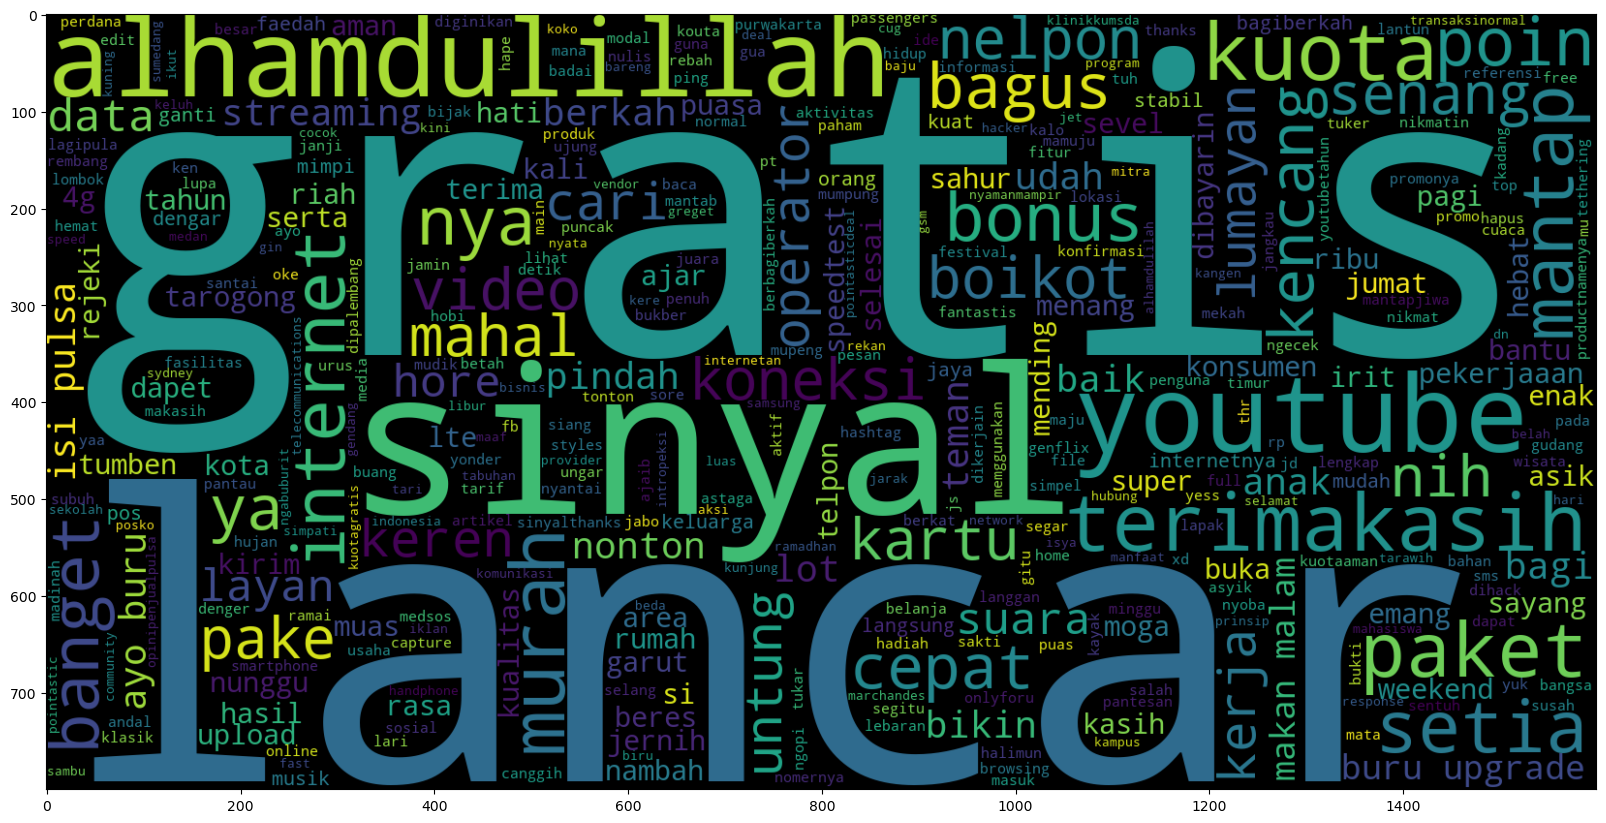

In [60]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.Sentiment == 'positive'].Komentar_tweet))
plt.imshow(wc , interpolation = 'bilinear')

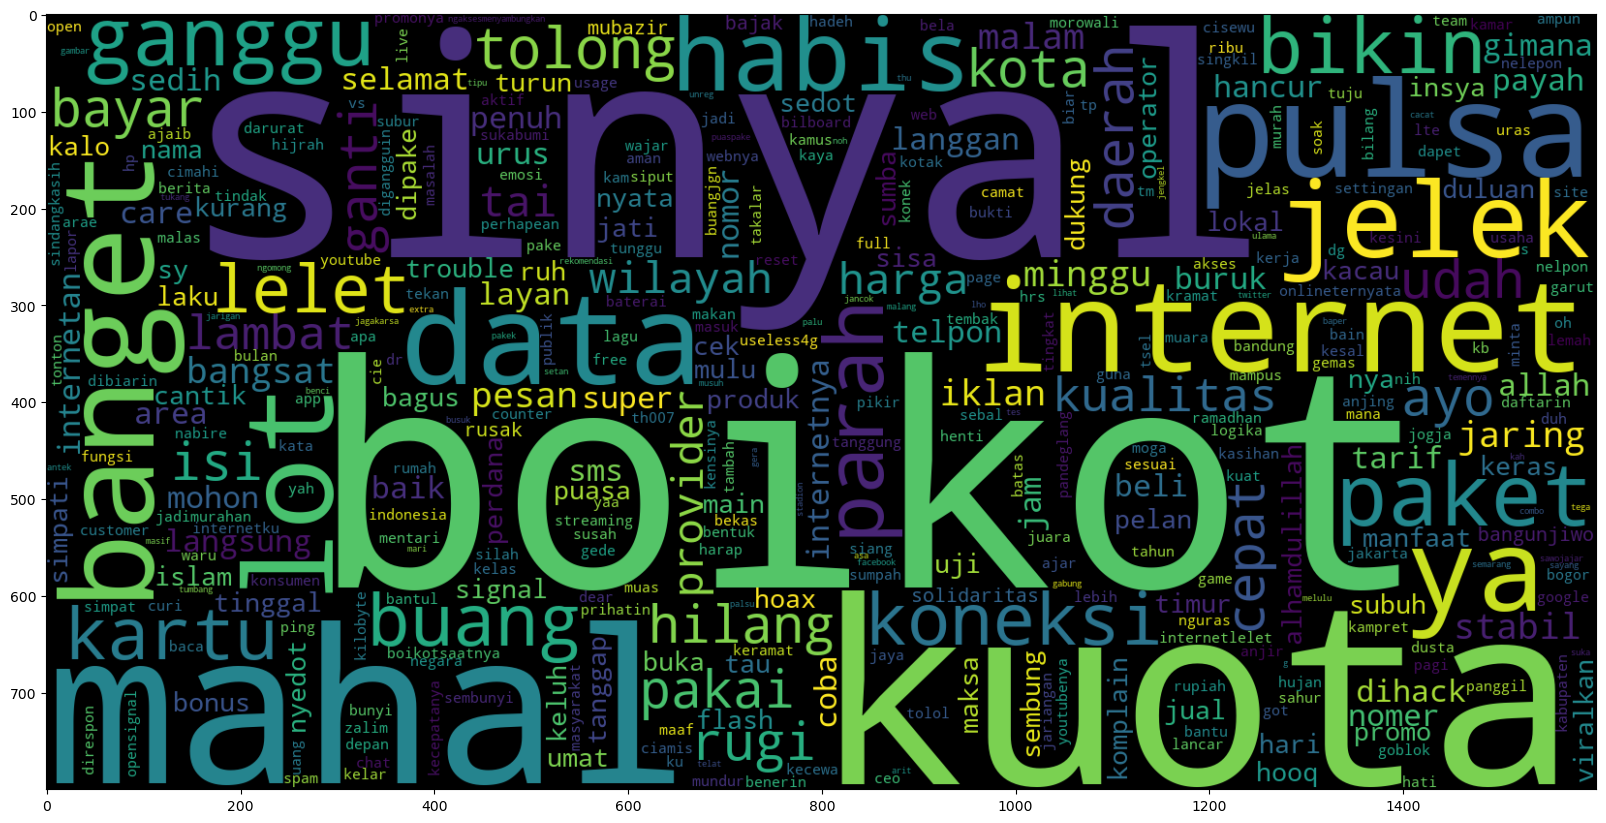

In [61]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.Sentiment == 'negative'].Komentar_tweet))
plt.imshow(wc , interpolation = 'bilinear')

In [62]:
dataset = dataset.astype({'Sentiment' : 'category'})
dataset = dataset.astype({'Komentar_tweet' : 'string'})
dataset.dtypes

ID                         int64
Sentiment               category
Komentar_tweet    string[python]
Sentiments                 int64
dtype: object

## 7. TF-IDF PROCESSING

In [63]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

tvec = CountVectorizer()
X_cVec = tvec.fit_transform(dataset['Komentar_tweet'].astype('U'))
print(X_cVec)

h_tfidf = TfidfTransformer()
x_tfidf = h_tfidf.fit_transform(X_cVec)
print(x_tfidf)

  (0, 78)	1
  (0, 481)	1
  (0, 44)	1
  (1, 188)	1
  (1, 151)	1
  (1, 547)	1
  (2, 3)	1
  (2, 270)	1
  (2, 228)	1
  (2, 491)	1
  (2, 602)	1
  (2, 662)	1
  (3, 228)	1
  (3, 491)	1
  (3, 602)	1
  (3, 365)	1
  (3, 80)	1
  (3, 453)	1
  (3, 121)	1
  (3, 329)	1
  (3, 366)	1
  (4, 602)	2
  (4, 453)	1
  (4, 121)	1
  (4, 329)	1
  :	:
  (290, 550)	1
  (291, 221)	1
  (291, 302)	1
  (291, 343)	1
  (291, 250)	1
  (293, 78)	1
  (293, 403)	1
  (293, 637)	1
  (294, 550)	1
  (295, 491)	1
  (295, 634)	1
  (295, 166)	1
  (295, 299)	1
  (296, 550)	1
  (296, 454)	1
  (297, 24)	1
  (297, 597)	1
  (297, 323)	1
  (297, 38)	1
  (297, 508)	1
  (297, 512)	1
  (298, 625)	1
  (298, 613)	1
  (299, 550)	1
  (299, 565)	1
  (0, 481)	0.6077594883278279
  (0, 78)	0.3984365587434562
  (0, 44)	0.6869328300526693
  (1, 547)	0.5773502691896257
  (1, 188)	0.5773502691896257
  (1, 151)	0.5773502691896257
  (2, 662)	0.3536062576902362
  (2, 602)	0.40204158622996927
  (2, 491)	0.3650310507311415
  (2, 270)	0.3853994182234336
  (

In [64]:
tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [65]:
print(len(tf_idf.get_feature_names_out()))

672


In [66]:
print(tf_idf.get_feature_names_out())

['00' '4g' '500' 'ajaib' 'ajar' 'akses' 'aksi' 'aktif' 'aktivitas'
 'alhamdulilah' 'alhamdulillah' 'allah' 'aman' 'ampun' 'an' 'anak' 'and'
 'andal' 'anjing' 'anjir' 'antek' 'apa' 'app' 'arae' 'area' 'arit'
 'artikel' 'asa' 'asik' 'astaga' 'asyik' 'ayo' 'baca' 'badai' 'bagi'
 'bagiberkah' 'bagus' 'bahan' 'baik' 'bain' 'bajak' 'baju' 'bandung'
 'banget' 'bangsa' 'bangsat' 'bangunjiwo' 'bantu' 'bantul' 'baper'
 'bareng' 'batas' 'baterai' 'bayar' 'beda' 'bekas' 'bela' 'belah'
 'belanja' 'beli' 'benci' 'benerin' 'bentuk' 'berbagiberkah' 'beres'
 'berita' 'berkah' 'berkat' 'besar' 'betah' 'biar' 'bijak' 'bikin'
 'bilang' 'bilboard' 'biru' 'bisnis' 'bogor' 'boikot' 'boikotsaatnya'
 'bonus' 'browsing' 'buang' 'buangjgn' 'buka' 'bukber' 'bukti' 'bulan'
 'bunyi' 'buru' 'buruk' 'busuk' 'cacat' 'camat' 'canggih' 'cantik'
 'capture' 'care' 'cari' 'cek' 'ceo' 'cepat' 'chat' 'ciamis' 'cie'
 'cimahi' 'cisewu' 'coba' 'cocok' 'combo' 'community' 'counter' 'cuaca'
 'cug' 'curi' 'customer' 'daerah' 'daft

In [67]:
X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,00,4g,500,ajaib,ajar,akses,aksi,aktif,aktivitas,alhamdulilah,...,ya,yaa,yah,yess,yonder,youtube,youtubenya,youtubetahun,yuk,zalim
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.511939,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.353606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.365249,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
X = np.array(data_tf_idf)
y = np.array(y)

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Ten features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k=500)
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 672
Reduced feature number: 500


In [71]:
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.265339
1,0.857724
2,0.265339
3,0.052069
4,0.036862
...,...
667,3.611343
668,0.314392
669,0.521927
670,0.992651


In [72]:
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.265339,00
1,0.857724,4g
2,0.265339,500
3,0.052069,ajaib
4,0.036862,ajar
...,...,...
667,3.611343,youtube
668,0.314392,youtubenya
669,0.521927,youtubetahun
670,0.992651,yuk


In [73]:
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
179,7.215594,gratis
322,7.171845,lancar
602,5.857439,terimakasih
365,4.706525,mantap
249,4.293084,jelek
...,...,...
304,0.001860,konsumen
196,0.000691,hari
159,0.000074,free
84,0.000038,buka


In [74]:
mask = chi2_features.get_support()
mask

array([False,  True, False, False, False,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True, False, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,

In [75]:
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['4g',
 'akses',
 'aksi',
 'aktivitas',
 'alhamdulilah',
 'alhamdulillah',
 'allah',
 'ampun',
 'an',
 'anak',
 'and',
 'andal',
 'anjing',
 'anjir',
 'apa',
 'app',
 'artikel',
 'asa',
 'asik',
 'astaga',
 'asyik',
 'badai',
 'bagi',
 'bagiberkah',
 'bagus',
 'bahan',
 'baik',
 'bajak',
 'bandung',
 'bangsa',
 'bangsat',
 'bangunjiwo',
 'bantul',
 'baper',
 'bareng',
 'bayar',
 'beda',
 'bekas',
 'belah',
 'belanja',
 'beli',
 'benerin',
 'berbagiberkah',
 'beres',
 'berkah',
 'berkat',
 'besar',
 'betah',
 'biar',
 'bijak',
 'bilang',
 'bilboard',
 'biru',
 'bogor',
 'boikot',
 'boikotsaatnya',
 'bonus',
 'browsing',
 'buang',
 'bukber',
 'bunyi',
 'buru',
 'buruk',
 'busuk',
 'cacat',
 'camat',
 'canggih',
 'cantik',
 'capture',
 'care',
 'cari',
 'cek',
 'chat',
 'ciamis',
 'cimahi',
 'cisewu',
 'coba',
 'combo',
 'cuaca',
 'customer',
 'daerah',
 'dapat',
 'darurat',
 'data',
 'deal',
 'dear',
 'dengar',
 'denger',
 'detik',
 'dibayarin',
 'dibiarin',
 'digangguin',
 'diginikan',


In [76]:

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [77]:
# Menampilkan fitur-fitur yang sudah diseleksi
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,4g,akses,aksi,aktivitas,alhamdulilah,alhamdulillah,allah,ampun,an,anak,...,wilayah,wisata,xd,yah,yess,yonder,youtube,youtubetahun,yuk,zalim
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

## 8. Process modeling Data

In [79]:
X = x_tfidf
Y = dataset['Sentiments']

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from joblib import dump 

x_train, X_test, y_train, Y_test = train_test_split(X_kbest_features, Y, test_size = 0.4, random_state = 42)

In [81]:
# Training the model
algorithm = GaussianNB()               # Load algoritma pembelajaran
model = algorithm.fit(x_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih

# Simpan model hasil traning
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [82]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [83]:
# Tampilkan label sebenarnya pada data uji (actual label)
Y_test

216    1
47     1
253    1
145    0
61     1
      ..
46     0
247    1
54     1
258    1
276    1
Name: Sentiments, Length: 120, dtype: int64

# 9. MODEL EVAL

Accuracy   :  0.8083333333333333
Precission :  0.7407407407407407
Recall     :  0.967741935483871
F1 score   :  0.8391608391608392
confusion matrix : 
 [[37 21]
 [ 2 60]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.76        58
           1       0.74      0.97      0.84        62

    accuracy                           0.81       120
   macro avg       0.84      0.80      0.80       120
weighted avg       0.84      0.81      0.80       120



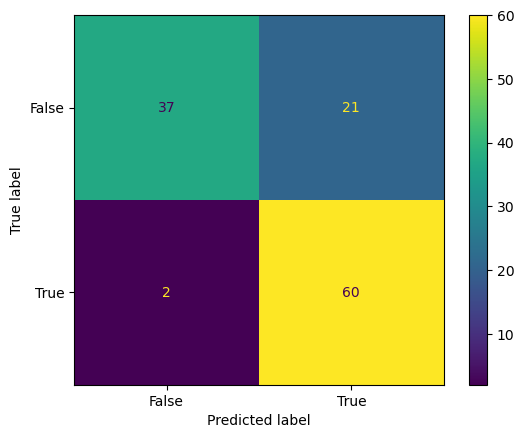

In [84]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

model = MultinomialNB()
model.fit(x_train, y_train)

predicted = model.predict(X_test)

print("Accuracy   : ", accuracy_score(Y_test, predicted))
print("Precission : ", precision_score(Y_test, predicted, average="binary", pos_label = 1))
print("Recall     : ", recall_score(Y_test, predicted, average="binary", pos_label = 1))
print("F1 score   : ", f1_score(Y_test, predicted, average="binary", pos_label = 1))

cm = confusion_matrix(Y_test, predicted)
print(f'confusion matrix : \n {cm}')
print(classification_report(Y_test, predicted, zero_division =  0))

cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_disp.plot()
plt.show()


In [85]:
from joblib import load

# load model
model = load('model_1.joblib')

# load vocabulary dari TF_idf
vocab = pickle.load(open('kbest_feature.pickle', 'rb'))

In [86]:
input_text = "buruk"

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

tf_idf_vec = tf_idf_vec.fit_transform([pre_input_text]).toarray()

# Transform the pre-processed text into a dense numpy array
#tf_idf_array = tf_idf_vec.transform([pre_input_text]).toarray()

# Make the prediction using the dense array
result = model.predict(tf_idf_vec)

#result = model.predict(tf_idf_vec)  # Lakukan prediksi

print ("=== Kalimat yang akan diprediksi ===\n", input_text, "\n")
print('=== Hasil Text Preprocessing ===\n', pre_input_text, "\n")

if (result==0):
  sentimen = 'Sentimen Positif'
else:
  sentimen = 'Sentimen negatif'


u r u k
=== Kalimat yang akan diprediksi ===
 buruk 

=== Hasil Text Preprocessing ===
 u r u k 

